In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn



In [2]:
seaborn.__version__


'0.9.0'

In [3]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  Direccion = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  Direccion = "/home/AnalisisYCuracion"
if 'ftfy' not in sys.modules:
    !pip install ftfy

In [4]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format 

In [5]:
datapasos = pandas.read_json(Direccion + "/pasos.json")

In [6]:
datapasos.shape


(252, 3)

In [7]:
datapasos.describe

<bound method NDFrame.describe of                                location                             name  \
0             [-54.832543, -68.3712885]       SAN SEBASTIAN  ( USHUAIA )   
1            [-54.8249379, -68.3258626]          AERO PUBLICO DE USHUAIA   
2            [-54.8096728, -68.3114748]      PUERTO USHUAIA (PREFECTURA)   
3            [-54.8019121, -68.3029511]                   PUERTO USHUAIA   
4            [-51.6896359, -72.2993574]        PASO LAURITA CASAS VIEJAS   
5            [-51.5866042, -72.3649779]                     PASO DOROTEA   
6            [-51.2544488, -72.2652242]           PASO RIO DON GUILLERMO   
7            [-53.3229179, -68.6063227]               PASO SAN SEBASTIAN   
8              [-53.78438, -67.7173342]              TERMINAL RIO GRANDE   
9            [-53.7860374, -67.7002243]                PUERTO RIO GRANDE   
10           [-52.2527012, -69.8852885]                     MONTE AYMOND   
11           [-52.1304141, -69.5198778]              I

In [8]:
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

Realizamos el histograma

In [9]:
datapasos[datapasos.name.duplicated(keep=False)]


,location,name,province
14,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,Santa Cruz
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...
22,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz
23,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz
30,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
31,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
53,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen
54,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen
63,"[-37.9341161, -57.5745361]",AERO MAR DEL PLATA,Buenos Aires
66,"[-32.825277, -70.0729456]",CRISTO REDENTOR (LIBERTADORES),Mendoza


In [10]:
coord = datapasos['location'].apply(pandas.Series) 
coord = coord.rename(columns = lambda x : 'coord_' + str(x))
datapasos = pandas.concat([datapasos[:], coord[:]], axis=1)
datapasos[coord.duplicated(keep=False)]

,location,name,province,coord_0,coord_1
14,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,Santa Cruz,-51.61,-69.31
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...,-51.61,-69.31
22,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz,-46.28,-71.73
23,"[-46.2752267, -71.7270022]",ING. PALLAVICINI - IBAÑEZ,Santa Cruz,-46.28,-71.73
30,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut,-45.79,-67.47
31,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut,-45.79,-67.47
32,"[-45.7894354, -67.4696871]",AEROPUERTO INTERNACIONAL GENERAL ENRIQUE MOSCONI,Chubut,-45.79,-67.47
38,"[-41.1467101, -71.1642129]",AEROPUERTO INTERNACIONAL TENIENTE LUIS CANDELA...,Rio Negro,-41.15,-71.16
45,"[-40.1133859, -71.6806031]",PASO HUA - HUM,Neuquen,-40.11,-71.68
53,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen,-38.95,-68.14


In [11]:
datapasos.province.describe()

count              252
unique              25
top       Buenos Aires
freq                48
Name: province, dtype: object

In [12]:
list(datapasos.province.unique())

['Tierra del Fuego',
 'Santa Cruz',
 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
 'Chubut',
 'Rio Negro',
 'Neuquen',
 'NEUQUEN',
 'Buenos Aires',
 'Mendoza',
 'San Luis',
 'San Juan',
 'Santa Fe',
 'Córdoba',
 'Cordoba',
 'Entre Rios',
 'La Rioja',
 'Corrientes',
 'Catamarca',
 'Santiago del Estero',
 'Tucuman',
 'Chaco',
 'Misiones',
 'Formosa',
 'Salta',
 'Jujuy']

In [13]:
datapasos2 = datapasos[datapasos.province != 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ']

datapasos2 = datapasos2.replace({'NEUQUEN': 'Neuquen', 'Córdoba': 'Cordoba'})
datapasos2.province.describe()

count              251
unique              22
top       Buenos Aires
freq                48
Name: province, dtype: object

In [14]:
datapasos2.groupby('province')['name','location'].nunique()

,name,location
province,,
Buenos Aires,45,42
Catamarca,3,3
Chaco,3,3
Chubut,14,13
Cordoba,3,3
Corrientes,15,15
Entre Rios,12,12
Formosa,11,9
Jujuy,8,8


/home/leo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Cantidad de provincias')

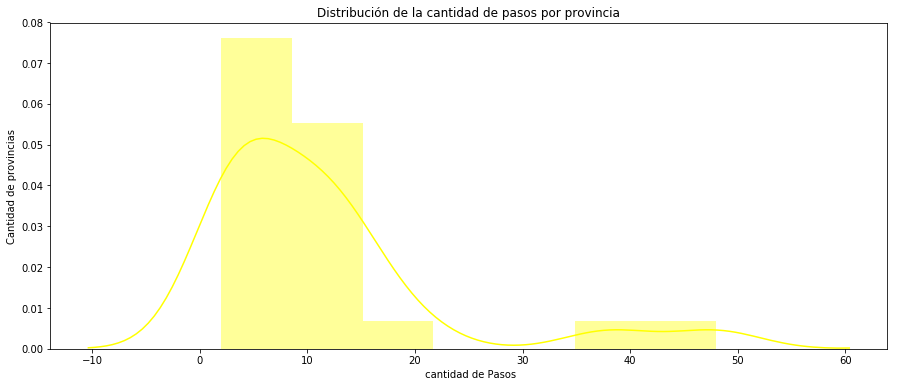

In [15]:
plt.figure(figsize=(15,6))
_ = sns.distplot(datapasos2.province.value_counts(), color='YELLOW')
_ = plt.title('Distribución de la cantidad de pasos por provincia')
plt.xlabel(" cantidad de Pasos")
plt.ylabel("Cantidad de provincias")

El número mas frecuente de pasos por provincia se encuentra en torno a 10 pasos

Ahora paa realizar un gráfico que indique la distribución de frecuencias de pasos por provincia, onstruimos un diagrama de barras.

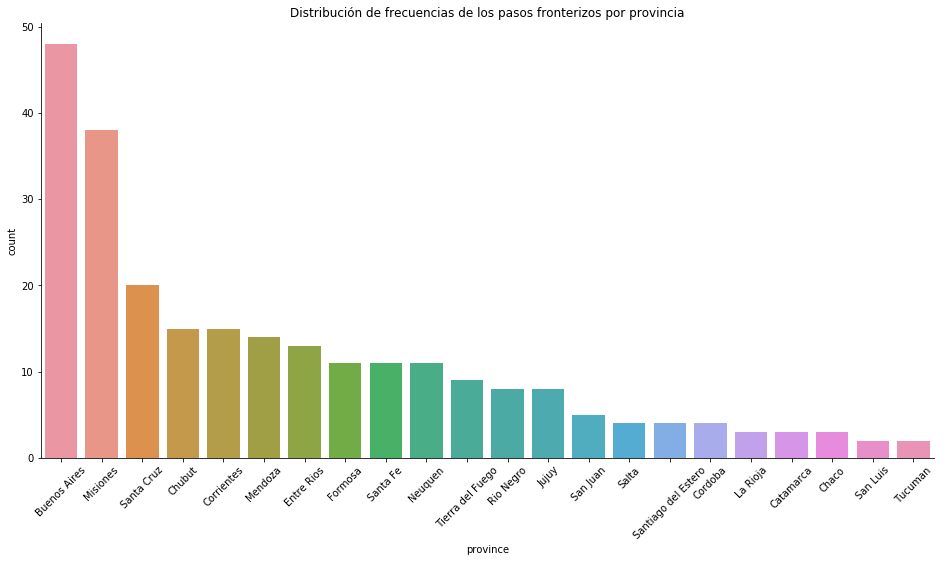

In [19]:

plt.figure(figsize=(16,8))

seaborn.countplot(x='province', data=datapasos2, order = datapasos2['province'].value_counts().index)
plt.title("Distribución de frecuencias de los pasos fronterizos por provincia")
plt.xticks(rotation=45)
seaborn.despine()